## Chapter 10

In [1]:
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 3.6.3"

## Problem 7

In the chapter, we mentioned the use of correlation-based distance
and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if
each observation has been centered to have mean zero and standard
deviation one, and if we let rij denote the correlation between the ith
and jth observations, then the quantity 1 − rij is proportional to the
squared Euclidean distance between the ith and jth observations.
On the USArrests data, show that this proportionality holds.

In [2]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [3]:
dim(USArrests)

[1] 50  4

In [4]:
apply(USArrests, 2, mean)

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [13]:
df=scale(USArrests)
set.seed(3)

In [22]:
matd=dist(df)^2

In [23]:
matc=as.dist((1-t(cor(t(df)))))
matc

                    Alabama       Alaska      Arizona     Arkansas   California
Alaska         0.7138307819                                                    
Arizona        1.4465947843 0.8307245898                                       
Arkansas       0.0877416809 0.3672785641 1.1766554172                          
California     1.8659223310 0.8137128067 0.2949017541 1.5863126412             
Colorado       1.6872310193 0.5155556175 0.5983808782 1.3709254337 0.1146234010
Connecticut    1.7135870980 1.8617870018 0.7759582405 1.8986422868 0.6631595707
Delaware       1.1428182422 1.4788738310 0.3411540927 1.1920258659 0.8973252909
Florida        0.1049203486 0.7861031722 1.0409926090 0.1421425885 1.7009808084
Georgia        0.1162516972 0.7367030469 1.7839695560 0.2511757376 1.8595181408
Hawaii         1.8059006680 1.5764752423 1.1458813737 1.9369776851 0.5651593270
Idaho          1.4792354141 0.7916559296 0.0025732601 1.1919825459 0.2520373794
Illinois       1.3090956230 1.8653950071

In [26]:
r=matc/matd
summary(r)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000086 0.069135 0.133943 0.234193 0.262589 4.887686 

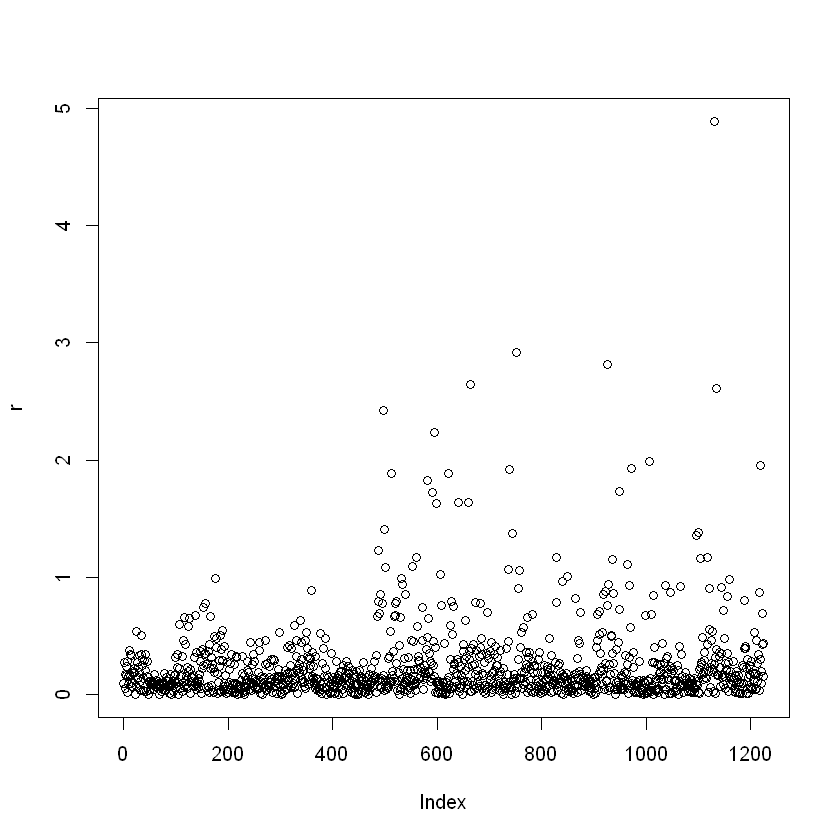

In [27]:
plot(r)

In Section 10.2.3, a formula for calculating PVE was given in Equation 10.8. We also saw that the PVE can be obtained using the sdev
output of the prcomp() function.
On the USArrests data, calculate PVE in two ways:

(a) Using the sdev output of the prcomp() function, as was done in
Section 10.2.3.

In [28]:
pr.out=prcomp(USArrests, scale=TRUE)
summary (pr.out)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.5749 0.9949 0.59713 0.41645
Proportion of Variance 0.6201 0.2474 0.08914 0.04336
Cumulative Proportion  0.6201 0.8675 0.95664 1.00000

In [79]:
pve =pr.out$sdev^2/sum(pr.out$sdev^2)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

(b) By applying Equation 10.8 directly. That is, use the prcomp()
function to compute the principal component loadings. Then,
use those loadings in Equation 10.8 to obtain the PVE.

In [86]:
pr.out$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


In [96]:
apply((as.matrix(scale(USArrests)) %*% pr.out$rotation)^2, 2, sum)/sum(apply(as.matrix(scale(USArrests))^2, 2, sum))

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752